## Lab Assignment Seven: Sequential Network Architectures

Team: Katie Laird, Cameron Miller, Will Landin

Dataset: 

Select a dataset that is text. That is, the dataset should be text data. In terms of generalization performance, it is helpful to have a medium sized dataset of similar sized text documents. It is fine to perform binary classification or multi-class classification. The classification should be "many-to-one" sequence classification.

Dataset: https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/

In [1]:
import numpy as np
import pandas as pd
import re
import gc

### Preparation

[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed). Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). Discuss methods of tokenization in your dataset as well as any decisions to force a specific length of sequence. 

In [2]:
# read in the dataset as a pandas dataframe
df = pd.read_csv("./Datasets/Corona_NLP.csv",encoding='latin1')
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,2/3/2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",2/3/2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,2/3/2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",3/3/2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


#### Clean the tweets text

In [3]:
def clean_tweet(tweet):
    # Remove any non-alphabetic characters except basic punctuation
    tweet = re.sub(r"[^a-zA-Z0-9.,'!? ]", '', tweet)
    # Remove any excess whitespace
    tweet = re.sub(r"\s+", ' ', tweet).strip()
    return tweet

In [4]:
df['OriginalTweet'] = df['OriginalTweet'].apply(clean_tweet)
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,2/3/2020,TRENDING New Yorkers encounter empty supermark...,Extremely Negative
1,2,44954,"Seattle, WA",2/3/2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,2/3/2020,Panic buying hits NewYork City as anxious shop...,Negative
4,5,44957,"Melbourne, Victoria",3/3/2020,toiletpaper dunnypaper coronavirus coronavirus...,Neutral


In [5]:
print (df.value_counts('Sentiment'))
label_counts = df['Sentiment'].value_counts()

Sentiment
Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: count, dtype: int64


#### One Hot Encode Sentiments

In [6]:
# One Hot Encoding of the sentiments changing Extremely Negative and Negative to 0, Neutral to 1, and Positive and Extremely Positive to 2
df['Sentiment'] = df['Sentiment'].replace('Extremely Negative', 0)
df['Sentiment'] = df['Sentiment'].replace('Negative', 0)
df['Sentiment'] = df['Sentiment'].replace('Neutral', 1)
df['Sentiment'] = df['Sentiment'].replace('Positive', 2)
df['Sentiment'] = df['Sentiment'].replace('Extremely Positive', 2)
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,2/3/2020,TRENDING New Yorkers encounter empty supermark...,0
1,2,44954,"Seattle, WA",2/3/2020,When I couldn't find hand sanitizer at Fred Me...,2
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and love...,2
3,4,44956,Chicagoland,2/3/2020,Panic buying hits NewYork City as anxious shop...,0
4,5,44957,"Melbourne, Victoria",3/3/2020,toiletpaper dunnypaper coronavirus coronavirus...,1


In [7]:
print(df['Sentiment'].value_counts())

Sentiment
2    19592
0    17031
1     8332
Name: count, dtype: int64


Undersample to balance the dataset

In [8]:
df_negative = df[df['Sentiment'] == 0]
df_neutral = df[df['Sentiment'] == 1]
df_positive = df[df['Sentiment'] == 2]

df_negative_sampled = df_negative.sample(n=min(8332, len(df_negative)), random_state=42)
df_neutral_sampled = df_neutral.sample(n=min(8332, len(df_neutral)), random_state=42)
df_positive_sampled = df_positive.sample(n=min(8332, len(df_positive)), random_state=42)

# Concatenate the sampled dataframes
df_undersampled = pd.concat([df_negative_sampled, df_neutral_sampled, df_positive_sampled])

# Optionally, shuffle the dataframe
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

df = df_undersampled
df.value_counts('Sentiment')

Sentiment
0    8332
1    8332
2    8332
Name: count, dtype: int64

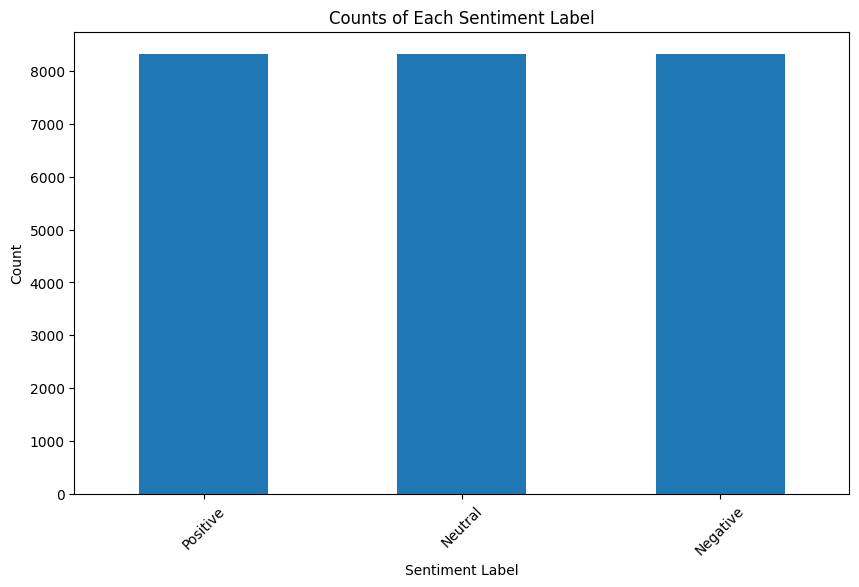

In [9]:
import matplotlib.pyplot as plt

label_counts = df['Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Counts of Each Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Positive', 'Neutral', 'Negative'], rotation=45)
plt.show()

In [10]:
avg_length = np.mean([len(tweet) for tweet in df['OriginalTweet']])
max_length = np.max([len(tweet) for tweet in df['OriginalTweet']])
min_length = np.min([len(tweet) for tweet in df['OriginalTweet']])
print(f"Average length of tweets: {avg_length:.2f} Characters")
print(f"Max length of tweets: {max_length} Characters")
print(f"Min length of tweets: {min_length} Characters")

Average length of tweets: 188.47 Characters
Max length of tweets: 315 Characters
Min length of tweets: 3 Characters


In [11]:
#delete the negative, neutral, positive, and undersampled dataframes to help with memory
del df_negative, df_neutral, df_positive, df_negative_sampled, df_neutral_sampled, df_positive_sampled, df_undersampled

gc.collect()

3084

[1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

Our metrics are going to be accurac and precision

[1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your train/test splitting method is a realistic mirroring of how an algorithm would be used in practice. 

2023-12-13 07:59:00.853319: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 07:59:00.853383: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 07:59:00.853433: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 07:59:00.861446: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(19996,) (5000,) (19996,) (5000,)
X_train Shape: (19996,) Label Shape: (19996,)
X_test Shape: (5000,) Label Shape: (5000, 3)
Number of Classes: 3


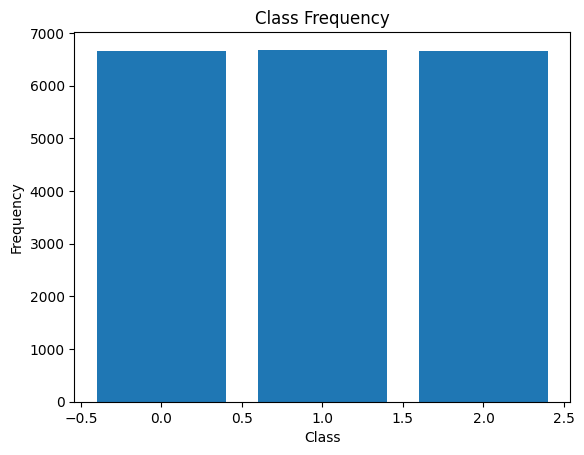

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(df['OriginalTweet'], df['Sentiment'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_test = keras.utils.to_categorical(y_test, 3)

# print some stats of the data
print("X_train Shape:",X_train.shape, "Label Shape:", y_train.shape)
print("X_test Shape:",X_test.shape, "Label Shape:", y_test.shape)
print("Number of Classes:", len(np.unique(y_train)))
plt.bar(np.unique(y_train, return_counts=True)[0], np.unique(y_train, return_counts=True)[1])
plt.title("Class Frequency")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [13]:
y_test[1]

array([0., 0., 1.], dtype=float32)

### Modeling

[3 points] Investigate at least two different sequential network architectures (e.g., a CNN and a Transformer). Alternatively, you may also choose a recurrent network and Transformer network. Be sure to use an embedding layer (try to use a pre-trained embedding, if possible). Adjust one hyper-parameter of each network to potentially improve generalization performance (train a total of at least four models). Visualize the performance of training and validation sets versus the training iterations, showing that the models converged.

#### Creating the embedding layer

In [14]:
%%time
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

NUM_TOP_WORDS = None # use entire vocabulary!
MAX_ART_LEN = np.max([len(tweet) for tweet in df['OriginalTweet']]) # maximum number of words in a tweet

#tokenize the text
tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
tokenizer.fit_on_texts(X_train)
# save as sequences with integers replacing words
sequences = tokenizer.texts_to_sequences(X_train)

word_index = tokenizer.word_index
NUM_TOP_WORDS = len(word_index) if NUM_TOP_WORDS==None else NUM_TOP_WORDS
top_words = min((len(word_index),NUM_TOP_WORDS))
print('Found %s unique tokens. Distilled to %d top words.' % (len(word_index),top_words))

X = pad_sequences(sequences, maxlen=MAX_ART_LEN)
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=MAX_ART_LEN)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=MAX_ART_LEN)


y_ohe = keras.utils.to_categorical(y_train, num_classes=3)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y_ohe.shape)
print(np.max(X))

Found 52091 unique tokens. Distilled to 52091 top words.
Shape of data tensor: (19996, 315)
Shape of label tensor: (19996, 3)
52091
CPU times: user 1.65 s, sys: 35.8 ms, total: 1.68 s
Wall time: 1.68 s


In [15]:
%%time
EMBED_SIZE = 100
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('./glove/glove.6B.100d.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 400000 word vectors.
Embedding Shape: (52092, 100) 
 Total words found: 21720 
 Percentage: 41.69546187514398
CPU times: user 6.04 s, sys: 304 ms, total: 6.34 s
Wall time: 6.34 s


In [16]:
from tensorflow.keras.layers import Embedding

# save this embedding now
embedding_layer = Embedding(len(word_index) + 1,
    EMBED_SIZE,
    weights=[embedding_matrix], # here is the embedding getting saved
    input_length=MAX_ART_LEN,
    trainable=False)

#### Creating Sequential Convolutional Neural Network

Here is a function to display the accuracy and loss of a passed in history and yhat of a model

In [17]:
from sklearn.metrics import classification_report

def plot_acc_loss(history, yhat):
    # print the accuracy and loss curves
    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Transformer Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Transformer Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.show()

Creating the models

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dropout, GlobalAveragePooling1D
from tensorflow.keras.layers import Subtract, Concatenate
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Embedding

def cnn_seq():
        EMBED_SIZE = 100  # same size as loaded from GLOVE
        sequence_input = Input(shape=(MAX_ART_LEN,), dtype='int32')
        embedded_sequences = embedding_layer(sequence_input) # from previous embedding
        
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(embedded_sequences)
        x = MaxPooling1D(5)(x)
        x = Dropout(0.2)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Dropout(0.2)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Flatten()(x)
        x = Dropout(0.2)(x)
        x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
        preds = Dense(3, activation='softmax', kernel_initializer='glorot_uniform')(x)

        model = Model(sequence_input, preds)

        model.compile(loss='categorical_crossentropy', 
                optimizer='rmsprop',
                metrics=['acc'])
        return model
    
model_cnn1 = cnn_seq()
history_c1 = model_cnn1.fit(X_train, y_ohe, epochs=10, batch_size=128, validation_split=0.2)
yhat_c1 = np.round(model_cnn1.predict(X_test))

2023-12-13 07:59:11.102773: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79087 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:4e:00.0, compute capability: 8.0


Epoch 1/10


2023-12-13 07:59:12.904007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905
2023-12-13 07:59:12.974467: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-13 07:59:13.120487: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-13 07:59:13.872813: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f254028fea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-13 07:59:13.872849: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-12-13 07:59:13.877452: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-13 07:59:13.959351: I ./tensorflow/compiler/jit/device_compil

125/125 [==============================] - 3s 8ms/step - loss: 1.0987 - acc: 0.3286 - val_loss: 1.0987 - val_acc: 0.3313
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 1.0986 - acc: 0.3334 - val_loss: 1.0988 - val_acc: 0.3313
Epoch 3/10
125/125 [==============================] - 1s 4ms/step - loss: 1.0986 - acc: 0.3319 - val_loss: 1.0987 - val_acc: 0.3313
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 1.0986 - acc: 0.3351 - val_loss: 1.0987 - val_acc: 0.3313
Epoch 5/10
125/125 [==============================] - 1s 4ms/step - loss: 1.0986 - acc: 0.3338 - val_loss: 1.0987 - val_acc: 0.3313
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 1.0987 - acc: 0.3324 - val_loss: 1.0987 - val_acc: 0.3313
Epoch 7/10
125/125 [==============================] - 1s 4ms/step - loss: 1.0986 - acc: 0.3278 - val_loss: 1.0988 - val_acc: 0.3313
Epoch 8/10
125/125 [==============================] - 1s 5ms/step - loss: 1.0987 - acc:

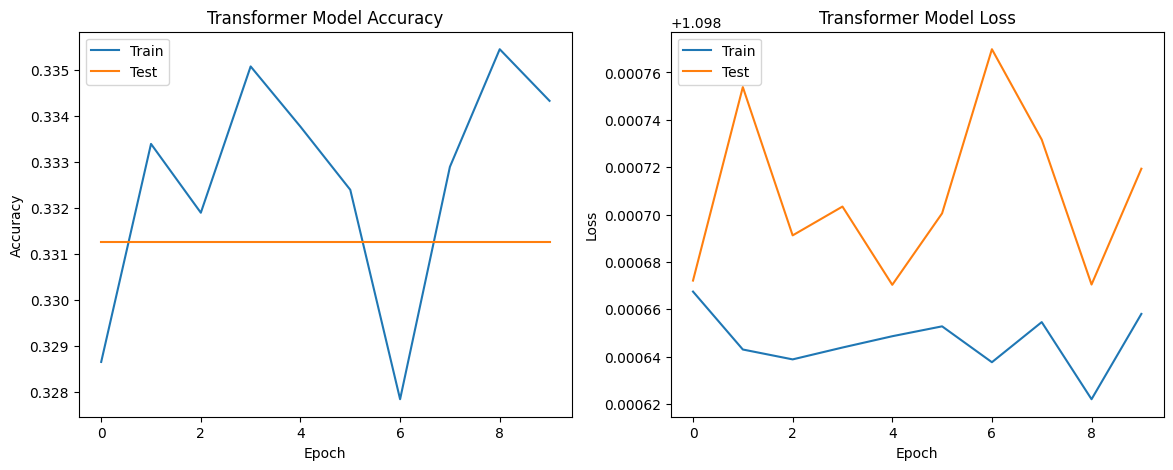

In [19]:
plot_acc_loss(history_c1, yhat_c1)

In [20]:
def cnn_seq():
        EMBED_SIZE = 100  # same size as loaded from GLOVE
        sequence_input = Input(shape=(MAX_ART_LEN,), dtype='int32')
        embedded_sequences = embedding_layer(sequence_input) # from previous embedding
        
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(embedded_sequences)
        x = MaxPooling1D(5)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Flatten()(x)
        x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
        preds = Dense(3, activation='softmax', kernel_initializer='glorot_uniform')(x)

        model = Model(sequence_input, preds)

        model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['acc'])
        return model
    
model_cnn2 = cnn_seq()
history_c2 = model_cnn2.fit(X_train, y_ohe, epochs=10, batch_size=128, validation_split=0.2)
yhat_c2 = np.round(model_cnn2.predict(X_test))

Epoch 1/10
125/125 [==============================] - 2s 6ms/step - loss: 1.0987 - acc: 0.3303 - val_loss: 1.0987 - val_acc: 0.3313
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 1.0986 - acc: 0.3267 - val_loss: 1.0987 - val_acc: 0.3313
Epoch 3/10
125/125 [==============================] - 1s 5ms/step - loss: 1.0986 - acc: 0.3330 - val_loss: 1.0987 - val_acc: 0.3268
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 1.0987 - acc: 0.3294 - val_loss: 1.0988 - val_acc: 0.3268
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 1.0987 - acc: 0.3322 - val_loss: 1.0988 - val_acc: 0.3313
Epoch 6/10
125/125 [==============================] - 1s 4ms/step - loss: 1.0986 - acc: 0.3301 - val_loss: 1.0988 - val_acc: 0.3313
Epoch 7/10
125/125 [==============================] - 1s 5ms/step - loss: 1.0986 - acc: 0.3295 - val_loss: 1.0987 - val_acc: 0.3313
Epoch 8/10
125/125 [==============================] - 1s 5ms/step - loss: 1.

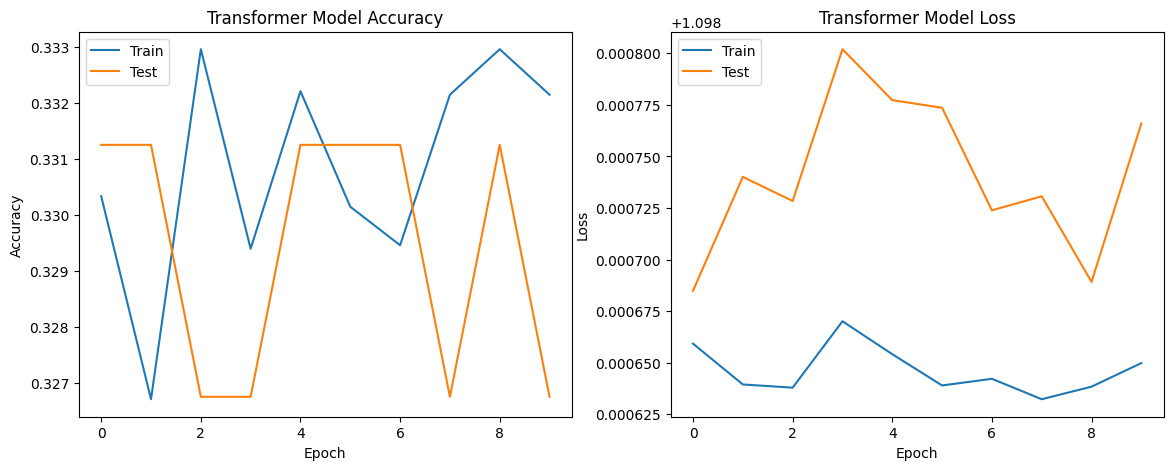

In [21]:
plot_acc_loss(history_c2, yhat_c2)

In [22]:
def cnn_seq_noGlove():
        EMBED_SIZE = 100  # same size as loaded from GLOVE
        sequence_input = Input(shape=(MAX_ART_LEN,), dtype='int32')
        embedded_sequences = Embedding(top_words,
                                      EMBED_SIZE,
                                      input_length=MAX_ART_LEN)(sequence_input) # from previous embedding
        
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(embedded_sequences)
        x = MaxPooling1D(5)(x)
        x = Dropout(0.2)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Dropout(0.2)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Flatten()(x)
        x = Dropout(0.2)(x)
        x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
        preds = Dense(3, activation='softmax', kernel_initializer='glorot_uniform')(x)

        model = Model(sequence_input, preds)

        model.compile(loss='categorical_crossentropy', 
                optimizer='rmsprop',
                metrics=['acc'])
        return model
    
model_cnn_ng = cnn_seq_noGlove()
history_cng = model_cnn_ng.fit(X_train, y_ohe, epochs=10, batch_size=128, validation_split=0.2)
yhat_cng = np.round(model_cnn_ng.predict(X_test))

Epoch 1/10
125/125 [==============================] - 12s 90ms/step - loss: 1.0997 - acc: 0.3333 - val_loss: 1.0987 - val_acc: 0.3268
Epoch 2/10
125/125 [==============================] - 6s 51ms/step - loss: 1.0990 - acc: 0.3332 - val_loss: 1.0989 - val_acc: 0.3268
Epoch 3/10
125/125 [==============================] - 3s 25ms/step - loss: 1.0988 - acc: 0.3388 - val_loss: 1.0987 - val_acc: 0.3313
Epoch 4/10
125/125 [==============================] - 3s 22ms/step - loss: 1.0988 - acc: 0.3350 - val_loss: 1.0987 - val_acc: 0.3313
Epoch 5/10
125/125 [==============================] - 3s 19ms/step - loss: 1.0988 - acc: 0.3331 - val_loss: 1.0986 - val_acc: 0.3313
Epoch 6/10
125/125 [==============================] - 2s 13ms/step - loss: 1.0988 - acc: 0.3285 - val_loss: 1.0985 - val_acc: 0.3420
Epoch 7/10
125/125 [==============================] - 2s 15ms/step - loss: 1.0988 - acc: 0.3301 - val_loss: 1.0987 - val_acc: 0.3268
Epoch 8/10
125/125 [==============================] - 1s 11ms/step -

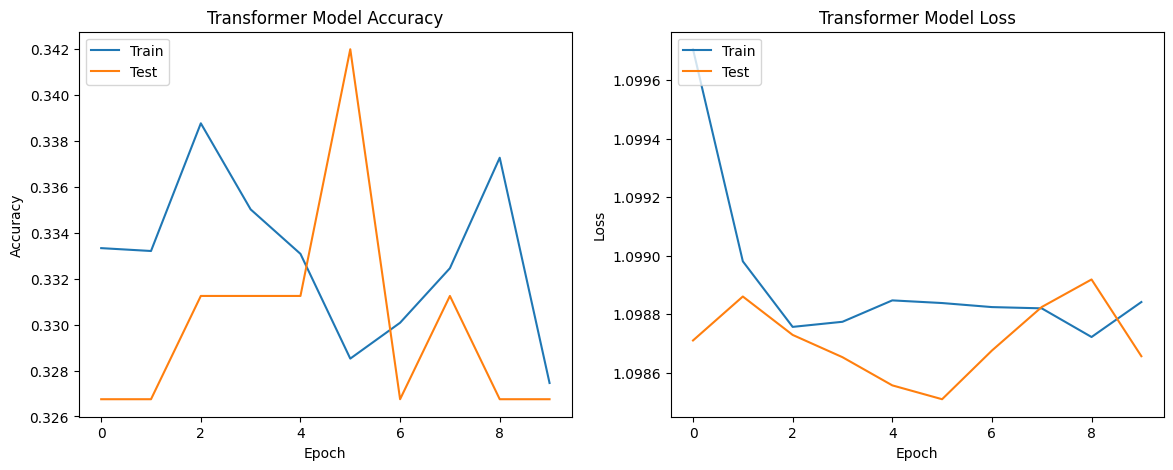

In [23]:
plot_acc_loss(history_cng, yhat_cng)

#### Creating Sequential Transformer

Updated plotting function to include area under the curve

In [24]:
def plot_acc_loss(history, yhat):
    # print the accuracy and loss curves
    plt.figure(figsize=(14,5))
    plt.subplot(1, 3, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Transformer Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Transformer Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 3, 3)
    plt.plot(history.history['val_auc'])
    plt.title('Transformer Model AUC')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')

    
    plt.show()

In [25]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Layer
import tensorflow as tf

# The transformer architecture 
class TransformerBlock(Layer): # inherit from Keras Layer
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.2):
        super().__init__()
        # setup the model heads and feedforward network
        self.att = MultiHeadAttention(num_heads=num_heads, 
                                      key_dim=embed_dim)
        
        # make a two layer network that processes the attention
        self.ffn = Sequential()
        self.ffn.add( Dense(ff_dim, activation='relu') )
        self.ffn.add( Dense(embed_dim) )
        
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        # apply the layers as needed (similar to PyTorch)
        
        # get the attention output from multi heads
        # Using same inpout here is self-attention
        # call inputs are (query, value, key) 
        # if only two inputs given, value and key are assumed the same
        attn_output = self.att(inputs, inputs)
        
        # create residual output, with attention
        out1 = self.layernorm1(inputs + attn_output)
        
        # apply dropout if training
        out1 = self.dropout1(out1, training=training)
        
        # place through feed forward after layer norm
        ffn_output = self.ffn(out1)
        out2 = self.layernorm2(out1 + ffn_output)
        
        # apply dropout if training
        out2 = self.dropout2(out2, training=training)
        #return the residual from Dense layer
        return out2
    
class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        # create two embeddings 
        # one for processing the tokens (words)
        self.token_emb = Embedding(input_dim=vocab_size, 
                                   output_dim=embed_dim)
        # another embedding for processing the position
        self.pos_emb = Embedding(input_dim=maxlen, 
                                 output_dim=embed_dim)

    def call(self, x):
        # create a static position measure (input)
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        # positions now goes from 0 to 500 (for IMdB) by 1
        positions = self.pos_emb(positions)# embed these positions
        x = self.token_emb(x) # embed the tokens
        return x + positions # add embeddngs to get final embedding

In [26]:
embed_dim = 32  # Embedding size for each token
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

def transformer_seq(X_train, X_test, y_train, y_test, epochs, num_heads, dropout, neurons):
    inputs = Input(shape=(X_train.shape[1],))
    x = TokenAndPositionEmbedding(X_train.shape[1], len(tokenizer.word_index) + 1, embed_dim)(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    x = Dense(neurons, activation='relu')(x)
    x = Dropout(dropout)(x)
    outputs = Dense(3, activation='sigmoid',
                kernel_initializer='glorot_uniform')(x)
    xformer = Model(inputs=inputs, outputs=outputs)
    xformer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['acc','AUC'])
    history = xformer.fit(
        X_train, y_train, batch_size=64, epochs=epochs,
        validation_data=(X_test, y_test),
    )

    yhat = np.round(xformer.predict(X_test))

    return history, yhat, xformer

In [27]:
# Transformer Model 1
history_t1, yhat_t1, model_t1 = transformer_seq(X_train, X_test, y_ohe, y_test, 10, 2, 0.2, 64)

Epoch 1/10
313/313 [==============================] - 31s 84ms/step - loss: 1.0918 - acc: 0.3755 - auc: 0.5393 - val_loss: 1.0324 - val_acc: 0.4386 - val_auc: 0.6570
Epoch 2/10
313/313 [==============================] - 8s 26ms/step - loss: 0.7856 - acc: 0.6547 - auc: 0.8107 - val_loss: 0.5765 - val_acc: 0.7976 - val_auc: 0.8964
Epoch 3/10
313/313 [==============================] - 5s 14ms/step - loss: 0.4129 - acc: 0.8581 - auc: 0.9395 - val_loss: 0.5799 - val_acc: 0.8064 - val_auc: 0.9194
Epoch 4/10
313/313 [==============================] - 5s 15ms/step - loss: 0.2454 - acc: 0.9187 - auc: 0.9760 - val_loss: 0.6861 - val_acc: 0.8018 - val_auc: 0.9114
Epoch 5/10
313/313 [==============================] - 5s 15ms/step - loss: 0.1652 - acc: 0.9413 - auc: 0.9874 - val_loss: 1.1493 - val_acc: 0.7680 - val_auc: 0.8780
Epoch 6/10
313/313 [==============================] - 3s 11ms/step - loss: 0.1144 - acc: 0.9591 - auc: 0.9929 - val_loss: 1.1691 - val_acc: 0.7464 - val_auc: 0.8779
Epoch 7/1

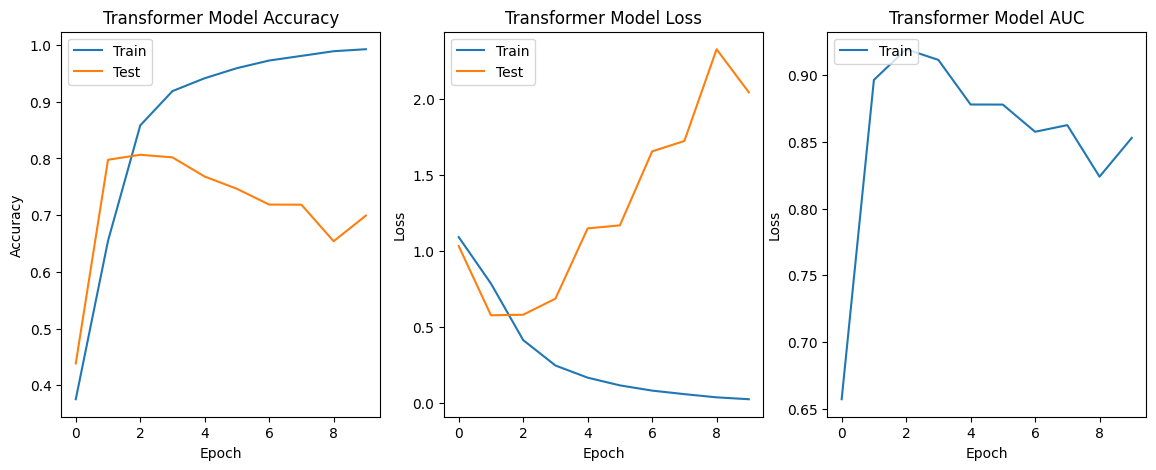

In [28]:
plot_acc_loss(history_t1, yhat_t1)

In [29]:
# Transformer 2
history_t2, yhat_t2, model_t2 = transformer_seq(X_train, X_test, y_ohe, y_test, 10, 3, 0.4, 128)

Epoch 1/10
313/313 [==============================] - 20s 54ms/step - loss: 1.0939 - acc: 0.3786 - auc: 0.5495 - val_loss: 1.0161 - val_acc: 0.4748 - val_auc: 0.6826
Epoch 2/10
313/313 [==============================] - 7s 23ms/step - loss: 0.7957 - acc: 0.6413 - auc: 0.8068 - val_loss: 0.6064 - val_acc: 0.7862 - val_auc: 0.9019
Epoch 3/10
313/313 [==============================] - 6s 18ms/step - loss: 0.4239 - acc: 0.8581 - auc: 0.9462 - val_loss: 0.5786 - val_acc: 0.8112 - val_auc: 0.9228
Epoch 4/10
313/313 [==============================] - 5s 17ms/step - loss: 0.2598 - acc: 0.9160 - auc: 0.9772 - val_loss: 0.8252 - val_acc: 0.7900 - val_auc: 0.9003
Epoch 5/10
313/313 [==============================] - 4s 12ms/step - loss: 0.1648 - acc: 0.9450 - auc: 0.9882 - val_loss: 0.9949 - val_acc: 0.7938 - val_auc: 0.8957
Epoch 6/10
313/313 [==============================] - 4s 11ms/step - loss: 0.1197 - acc: 0.9585 - auc: 0.9921 - val_loss: 1.0805 - val_acc: 0.7628 - val_auc: 0.8880
Epoch 7/1

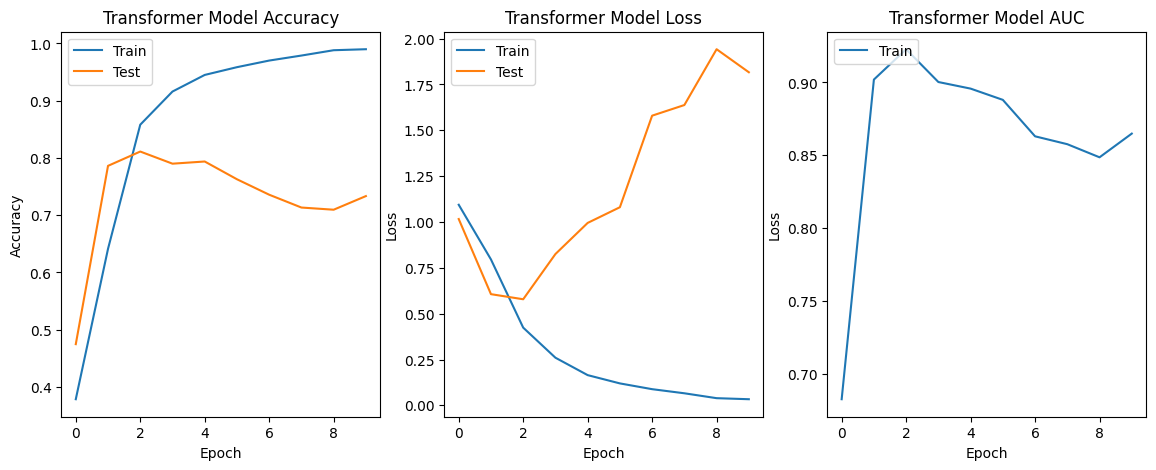

In [30]:
plot_acc_loss(history_t2, yhat_t2)

In [31]:
def transformer_seq_double(X_train, X_test, y_train, y_test, epochs, num_heads, dropout, neurons):
    inputs = Input(shape=(X_train.shape[1],))
    x = TokenAndPositionEmbedding(X_train.shape[1], len(tokenizer.word_index) + 1, embed_dim)(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x) # Second Block
    
    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    x = Dense(neurons, activation='relu')(x)
    x = Dropout(dropout)(x)
    outputs = Dense(3, activation='sigmoid',
                kernel_initializer='glorot_uniform')(x)

    xformer = Model(inputs=inputs, outputs=outputs)

    xformer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['acc'])

    history = xformer.fit(
        X_train, y_train, batch_size=64, epochs=epochs,
        validation_data=(X_test, y_test),
    )

    yhat = np.round(xformer.predict(X_test))

    return history, yhat, xformer

In [32]:
# Transformer 3
history_t3, yhat_t3, model_t3 = transformer_seq_double(X_train, X_test, y_ohe, y_test, 10, 6, 0.4, 128)

Epoch 1/10
313/313 [==============================] - 25s 63ms/step - loss: 1.0809 - acc: 0.3874 - val_loss: 0.8984 - val_acc: 0.5292
Epoch 2/10
313/313 [==============================] - 8s 26ms/step - loss: 0.7340 - acc: 0.7145 - val_loss: 0.6342 - val_acc: 0.7924
Epoch 3/10
313/313 [==============================] - 7s 22ms/step - loss: 0.4992 - acc: 0.8254 - val_loss: 0.5950 - val_acc: 0.8102
Epoch 4/10
313/313 [==============================] - 7s 21ms/step - loss: 0.2965 - acc: 0.8976 - val_loss: 0.7212 - val_acc: 0.7998
Epoch 5/10
313/313 [==============================] - 6s 20ms/step - loss: 0.1863 - acc: 0.9384 - val_loss: 0.8629 - val_acc: 0.7798
Epoch 6/10
313/313 [==============================] - 6s 20ms/step - loss: 0.1139 - acc: 0.9633 - val_loss: 0.9592 - val_acc: 0.7866
Epoch 7/10
313/313 [==============================] - 6s 20ms/step - loss: 0.0801 - acc: 0.9758 - val_loss: 1.0388 - val_acc: 0.7770
Epoch 8/10
313/313 [==============================] - 6s 18ms/step -

[2 points] Use the method of train/test splitting and evaluation criteria that you argued for at the beginning of the lab. Visualize the results of all the models you trained.  Use proper statistical comparison techniques to determine which method(s) is (are) superior.  

In [33]:
from statsmodels.stats.contingency_tables import mcnemar

correct_pred1 = np.argmax(yhat_t1, axis=1) == np.argmax(y_test, axis=1)
correct_pred2 = np.argmax(yhat_t2, axis=1) == np.argmax(y_test, axis=1)
correct_pred3 = np.argmax(yhat_t3, axis=1) == np.argmax(y_test, axis=1)


def calculate_mcnemar(correct1, correct2):
    # Count the number of times each model was correct/incorrect
    n00 = n01 = n10 = n11 = 0
    for i in range(len(correct1)):
        if correct1[i] and correct2[i]:
            n11 += 1
        elif correct1[i] and not correct2[i]:
            n10 += 1
        elif not correct1[i] and correct2[i]:
            n01 += 1
        elif not correct1[i] and not correct2[i]:
            n00 += 1
    
    # Construct the contingency table
    table = [[n11, n10],
             [n01, n00]]
    
    # Perform McNemar's test
    result = mcnemar(table, exact=False, correction=True)  # Use correction for small sample sizes
    return result

# Calculate McNemar's test
result1_2 = calculate_mcnemar(correct_pred1, correct_pred2)
result1_3 = calculate_mcnemar(correct_pred1, correct_pred3)
result2_3 = calculate_mcnemar(correct_pred2, correct_pred3)

print(f'Transformer 1 vs Transformer 2: stat={result1_2.statistic}, p-value={result1_2.pvalue:.3f}')
print(f'Transformer 1 vs Double Transformer: stat={result1_3.statistic}, p-value={result1_3.pvalue:.3f}')
print(f'Transformer 2 vs Double Transformer: stat={result2_3.statistic}, p-value={result2_3.pvalue:.3f}')

Transformer 1 vs Transformer 2: stat=56.74446085672083, p-value=0.000
Transformer 1 vs Double Transformer: stat=102.1720207253886, p-value=0.000
Transformer 2 vs Double Transformer: stat=15.009868421052632, p-value=0.000


### Exceptional Work

[1 points] Use the pre-trained ConceptNet Numberbatch embedding and compare to pre-trained GloVe. Which method is better for your specific application? 

In [41]:
class GloveTokenAndPositionEmbedding(Layer):
    def __init__(self):
        super().__init__()
        # create two embeddings 
        # one for processing the tokens, pretrained (words)
        self.token_emb = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)
        
        # another embedding for processing the position
        self.pos_emb = Embedding(MAX_ART_LEN, 
                                 EMBED_SIZE, 
                                 input_length=MAX_ART_LEN,
                                 trainable=True
                                )

    def call(self, x):
        # create a static position measure (input)
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        # positions now goes from 0 to 500 (for IMdB) by 1
        positions = self.pos_emb(positions)# embed these positions
        x = self.token_emb(x) # embed the tokens
        return x + positions # add embeddngs to get final embedding

In [55]:
embed_dim = 300  # Embedding size for each token
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

def transformer_glove(X_train, X_test, y_train, y_test, epochs, num_heads, dropout, neurons):
    inputs = Input(shape=(X_train.shape[1],))
    x = GloveTokenAndPositionEmbedding()(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    
    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    x = Dense(neurons, activation='relu')(x)
    x = Dropout(dropout)(x)
    outputs = Dense(3, activation='sigmoid',
                kernel_initializer='glorot_uniform')(x)
    xformer = Model(inputs=inputs, outputs=outputs)
    xformer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['acc','AUC'])
    history = xformer.fit(
        X_train, y_train, batch_size=64, epochs=epochs,
        validation_data=(X_test, y_test),
    )

    yhat = np.round(xformer.predict(X_test))

    return history, yhat, xformer

In [57]:
history_tgl, yhat_tgl, model_tgl = transformer_glove(X_train, X_test, y_ohe, y_test, 20, 3, 0.4, 128)

Epoch 1/20
313/313 [==============================] - 12s 27ms/step - loss: 1.0485 - acc: 0.4476 - auc: 0.6061 - val_loss: 0.9279 - val_acc: 0.5534 - val_auc: 0.7305
Epoch 2/20
313/313 [==============================] - 8s 25ms/step - loss: 0.7575 - acc: 0.6958 - auc: 0.7702 - val_loss: 0.6430 - val_acc: 0.7524 - val_auc: 0.8495
Epoch 3/20
313/313 [==============================] - 8s 25ms/step - loss: 0.6445 - acc: 0.7567 - auc: 0.8118 - val_loss: 0.6202 - val_acc: 0.7664 - val_auc: 0.8479
Epoch 4/20
313/313 [==============================] - 8s 25ms/step - loss: 0.6057 - acc: 0.7748 - auc: 0.8114 - val_loss: 0.5995 - val_acc: 0.7772 - val_auc: 0.8319
Epoch 5/20
313/313 [==============================] - 8s 25ms/step - loss: 0.5780 - acc: 0.7848 - auc: 0.8193 - val_loss: 0.5781 - val_acc: 0.7832 - val_auc: 0.8453
Epoch 6/20
313/313 [==============================] - 8s 25ms/step - loss: 0.5622 - acc: 0.7909 - auc: 0.8315 - val_loss: 0.5914 - val_acc: 0.7862 - val_auc: 0.8510
Epoch 7/2

### Conceptnet embedding

In [58]:
EMBED_SIZE = 300
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('./numberbatch/numberbatch-en.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix_cn = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix_cn[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix_cn.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix_cn.shape[0])

Found 516783 word vectors.
Embedding Shape: (52092, 300) 
 Total words found: 19769 
 Percentage: 37.9501650925286


In [59]:
class CNTokenAndPositionEmbedding(Layer):
    def __init__(self):
        super().__init__()
        # create two embeddings 
        # one for processing the tokens, pretrained (words)
        self.token_emb = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix_cn],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)
        
        # another embedding for processing the position
        self.pos_emb = Embedding(MAX_ART_LEN, 
                                 EMBED_SIZE, 
                                 input_length=MAX_ART_LEN,
                                 trainable=True
                                )

    def call(self, x):
        # create a static position measure (input)
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        # positions now goes from 0 to 500 (for IMdB) by 1
        positions = self.pos_emb(positions)# embed these positions
        x = self.token_emb(x) # embed the tokens
        return x + positions # add embeddngs to get final embedding

In [60]:
embed_dim = 300  # Embedding size for each token
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

def transformer_conceptnet(X_train, X_test, y_train, y_test, epochs, num_heads, dropout, neurons):
    inputs = Input(shape=(X_train.shape[1],))
    x = CNTokenAndPositionEmbedding()(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    
    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    x = Dense(neurons, activation='relu')(x)
    x = Dropout(dropout)(x)
    outputs = Dense(3, activation='sigmoid',
                kernel_initializer='glorot_uniform')(x)
    xformer = Model(inputs=inputs, outputs=outputs)
    xformer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['acc','AUC'])
    history = xformer.fit(
        X_train, y_train, batch_size=64, epochs=epochs,
        validation_data=(X_test, y_test),
    )

    yhat = np.round(xformer.predict(X_test))

    return history, yhat, xformer

In [ ]:
history_tcn, yhat_tcn, model_tcn = transformer_glove(X_train, X_test, y_ohe, y_test, 20, 3, 0.4, 128)

Epoch 1/20
313/313 [==============================] - 11s 26ms/step - loss: 1.0602 - acc: 0.4366 - auc: 0.5877 - val_loss: 1.0077 - val_acc: 0.5126 - val_auc: 0.6417
Epoch 2/20
313/313 [==============================] - 8s 25ms/step - loss: 0.7940 - acc: 0.6684 - auc: 0.7625 - val_loss: 0.6451 - val_acc: 0.7492 - val_auc: 0.8728
Epoch 3/20
313/313 [==============================] - 8s 25ms/step - loss: 0.6458 - acc: 0.7559 - auc: 0.8145 - val_loss: 0.6373 - val_acc: 0.7522 - val_auc: 0.8614
Epoch 4/20
313/313 [==============================] - 8s 25ms/step - loss: 0.5985 - acc: 0.7756 - auc: 0.8362 - val_loss: 0.6315 - val_acc: 0.7684 - val_auc: 0.8748
Epoch 5/20
313/313 [==============================] - 8s 25ms/step - loss: 0.5827 - acc: 0.7836 - auc: 0.8371 - val_loss: 0.5861 - val_acc: 0.7800 - val_auc: 0.8843
Epoch 6/20
313/313 [==============================] - 8s 25ms/step - loss: 0.5571 - acc: 0.7924 - auc: 0.8428 - val_loss: 0.5851 - val_acc: 0.7848 - val_auc: 0.8737
Epoch 7/2

In [ ]:
correct_pred1 = np.argmax(yhat_tgl, axis=1) == np.argmax(y_test, axis=1)
correct_pred2 = np.argmax(yhat_tcn, axis=1) == np.argmax(y_test, axis=1)


result = calculate_mcnemar(correct_pred1, correct_pred2)

print(f'Transformer Glove Embed vs Transformer ConceptN: stat={result.statistic}, p-value={result.pvalue:.3f}')